In [59]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
img = cv2.imread('Test Image/maria-sharapova-chapter-sn.jpg')
img.shape

(358, 500, 3)

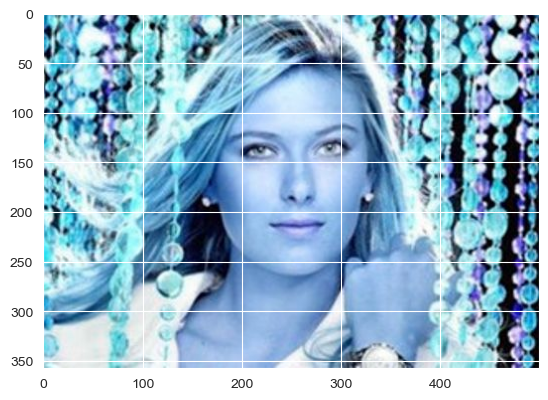

In [61]:
plt.imshow(img)

In [62]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(358, 500)

In [63]:
gray

array([[121, 125, 115, ..., 201, 187, 173],
       [126, 128, 114, ..., 189, 181, 170],
       [136, 134, 116, ..., 138, 143, 140],
       ...,
       [191, 198, 210, ...,  11,  11,  10],
       [190, 193, 199, ...,   8,   8,   7],
       [190, 189, 189, ...,   4,   4,   4]], dtype=uint8)

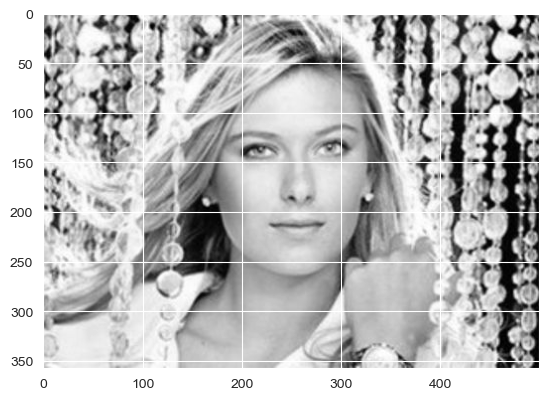

In [64]:
plt.imshow(gray, cmap='gray')

In [65]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


In [66]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[169,  73, 173, 173]])

In [67]:
(x,y,w,h) = faces[0]
x,y,w,h

(169, 73, 173, 173)

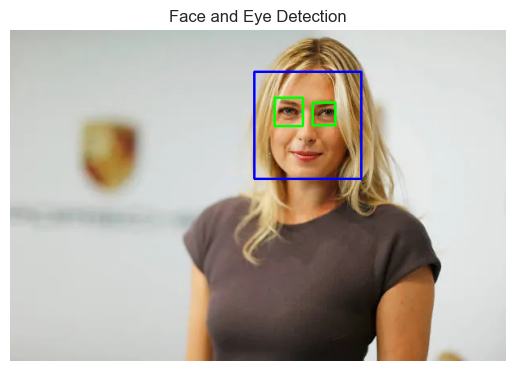

In [68]:
import cv2
import matplotlib.pyplot as plt

# Load cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load image
img = cv2.imread("Test Image/com_-sc4_3zsJrkbPGn6qh91FmkDDmAjEUmsnAFXPHBHUrc_rs_fit_860_0_0_0_g_ce_aHR0cHM6Ly9tZWRp_YS5nZXR0eWltYWdl_cy5jb20vaWQvMTY3_MTY4NDM2L3Bob3Rv_L3N0dXR0Z2FydC1n_ZXJtYW55LXRlbm5p_c.jpg")
if img is None:
    raise ValueError("Image not found or cannot be opened.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Draw rectangles and detect eyes
for (x, y, w, h) in faces:
    # Draw face rectangle directly on img (in-place)
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Convert BGR to RGB for correct display with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Face and Eye Detection')
plt.show()


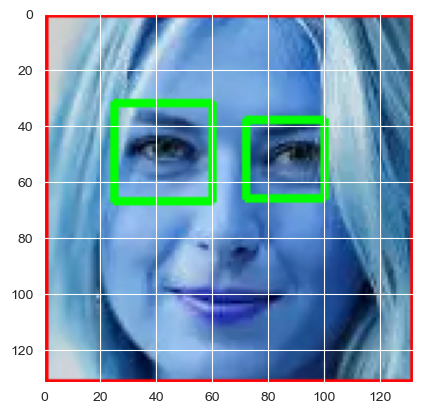

In [69]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [70]:
cropped_img = np.array(roi_color)
cropped_img.shape

(132, 132, 3)

In [71]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

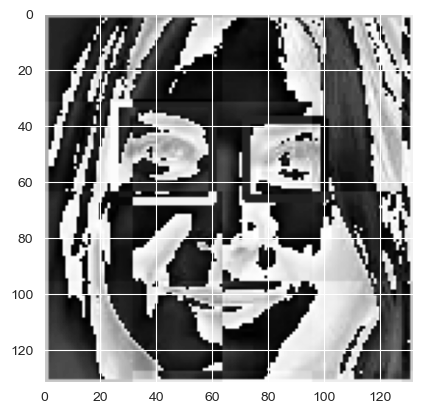

In [72]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [73]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)  # ✅ read image from path

    if img is None:
        print("Image not loaded:", image_path)
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

    return None



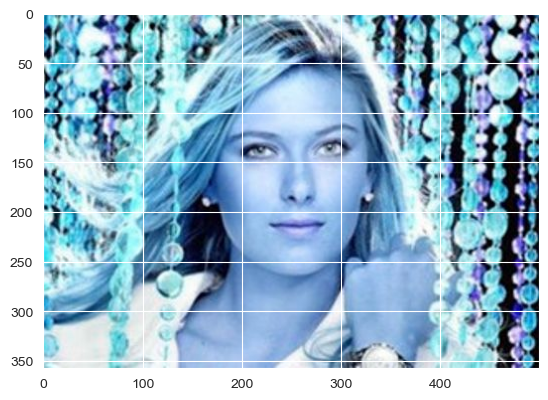

In [74]:
original_image = cv2.imread('Test Image/maria-sharapova-chapter-sn.jpg')
plt.imshow(original_image)

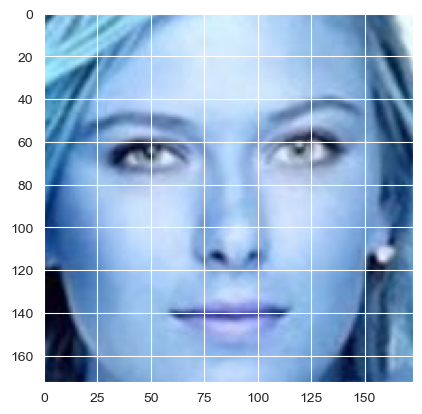

In [75]:
cropped_image = get_cropped_image_if_2_eyes('Test Image/maria-sharapova-chapter-sn.jpg')
plt.imshow(cropped_image)

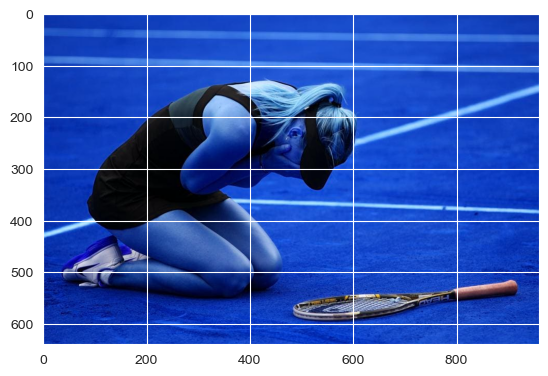

In [76]:
org_image_obstructed = cv2.imread('Test Image/000022.jpg')
plt.imshow(org_image_obstructed)

In [77]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('Test Image/000022.jpg')
cropped_image_no_2_eyes

In [78]:
path_to_data = r"C:\Users\Anu indrani Roy\Desktop\Sports_Project\model\Sports_Dataset"
path_to_cr_data = r"C:\Users\Anu indrani Roy\Desktop\Sports_Project\model\Sports_Dataset\Cropped"

In [79]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [80]:
img_dirs

['C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cristiano Ronaldo',
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped',
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Maria Sharapova',
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Neeraj Chopra',
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Rafal Nadal',
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Rohit Sharma',
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Virat Kohli']

In [81]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [82]:
import os
import cv2
import re

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1

    # Safe folder name extraction and cleanup
    celebrity_name = os.path.basename(img_dir).strip()
    celebrity_name = re.sub(r'[<>:"/\\|?*]', '', celebrity_name)  # removes illegal characters

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file():
            roi_color = get_cropped_image_if_2_eyes(entry.path)

            if roi_color is not None:
                # Join path safely
                cropped_folder = os.path.join(path_to_cr_data, "Cropped_" + celebrity_name)

                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)

                cropped_file_name = f"{celebrity_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1


Generating cropped images in folder: C:\Users\Anu indrani Roy\Desktop\Sports_Project\model\Sports_Dataset\Cropped\Cropped_Cristiano Ronaldo
Generating cropped images in folder: C:\Users\Anu indrani Roy\Desktop\Sports_Project\model\Sports_Dataset\Cropped\Cropped_Maria Sharapova
Generating cropped images in folder: C:\Users\Anu indrani Roy\Desktop\Sports_Project\model\Sports_Dataset\Cropped\Cropped_Neeraj Chopra
Generating cropped images in folder: C:\Users\Anu indrani Roy\Desktop\Sports_Project\model\Sports_Dataset\Cropped\Cropped_Rafal Nadal
Generating cropped images in folder: C:\Users\Anu indrani Roy\Desktop\Sports_Project\model\Sports_Dataset\Cropped\Cropped_Rohit Sharma
Generating cropped images in folder: C:\Users\Anu indrani Roy\Desktop\Sports_Project\model\Sports_Dataset\Cropped\Cropped_Virat Kohli


In [83]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Cristiano Ronaldo': ['C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Cristiano Ronaldo\\Cristiano Ronaldo_1.png',
  'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Cristiano Ronaldo\\Cristiano Ronaldo_10.png',
  'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Cristiano Ronaldo\\Cristiano Ronaldo_11.png',
  'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Cristiano Ronaldo\\Cristiano Ronaldo_12.png',
  'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Cristiano Ronaldo\\Cristiano Ronaldo_13.png',
  'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Cristiano Ronaldo\\Cristiano Ronaldo_14.png',
  'C:\\Users\\Anu indrani Roy\\Desk

In [84]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Cristiano Ronaldo': 0,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Maria Sharapova': 1,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Neeraj Chopra': 2,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Rafal Nadal': 3,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Rohit Sharma': 4,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Virat Kohli': 5}

In [85]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [86]:
len(X[0])

4096

In [87]:
X[0]

array([[28],
       [23],
       [55],
       ...,
       [ 5],
       [ 2],
       [ 0]], dtype=uint8)

In [88]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(143, 4096)

In [89]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8333333333333334

In [91]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.50      0.50      0.50         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         5
           5       1.00      0.73      0.84        11

    accuracy                           0.83        36
   macro avg       0.87      0.78      0.80        36
weighted avg       0.86      0.83      0.83        36



In [92]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [93]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [94]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.766667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.663636,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.758442,{'logisticregression__C': 1}


In [95]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [96]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [97]:
best_estimators['random_forest'].score(X_test,y_test)

0.75

In [98]:

best_estimators['logistic_regression'].score(X_test,y_test)

0.75

In [99]:
best_clf = best_estimators['svm']

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[13,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  5,  0],
       [ 3,  0,  0,  0,  0,  8]], dtype=int64)

Text(97.72222222222221, 0.5, 'Truth')

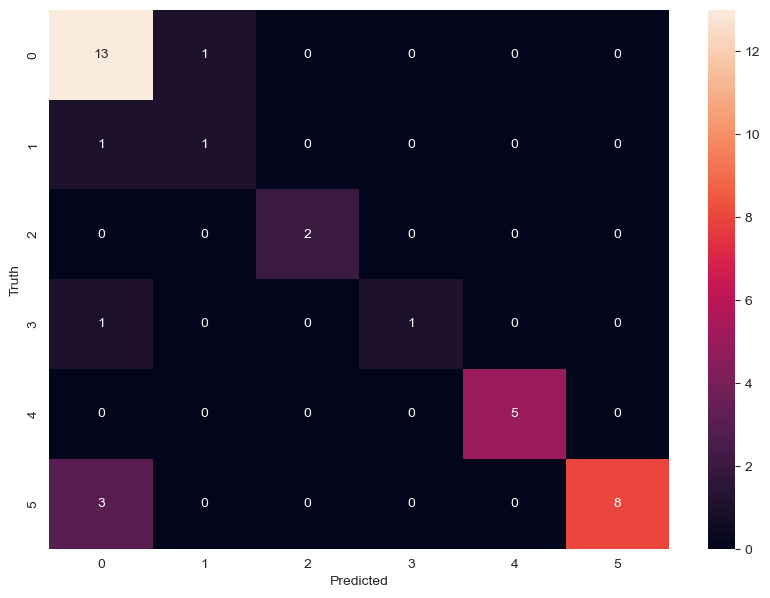

In [101]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [102]:
class_dict

{'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Cristiano Ronaldo': 0,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Maria Sharapova': 1,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Neeraj Chopra': 2,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Rafal Nadal': 3,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Rohit Sharma': 4,
 'C:\\Users\\Anu indrani Roy\\Desktop\\Sports_Project\\model\\Sports_Dataset\\Cropped\\Cropped_Virat Kohli': 5}

In [103]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [104]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))